In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, LeakyReLU
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [3]:
import tensorflow as tf
import datetime

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

In [8]:
print(type(X_train[0]))

<class 'numpy.ndarray'>


In [5]:
def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = Dropout(0.1)(x)
    x = LeakyReLU()(x)
    return x


def model(input_shape):
    inputs = Input((input_shape))
    conv_1= Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2, 2)) (conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
    flatten= Flatten() (maxp_2)
    dense_1= Dense(4096,activation=LeakyReLU())(flatten)
    drop_1=Dropout(0.2)(dense_1)
    output= Dense(10,activation="softmax")(drop_1)

    model = Model(inputs=[inputs], outputs=[output])
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
    return model

In [6]:
Model=model(input_shape = (32,32,3))
Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0     

In [7]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

History=Model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=10,callbacks=[tensorboard_callback])

Epoch 1/10
1563/1563 [==============================] - 189s 121ms/step - loss: 20.1491 - accuracy: 0.3296 - val_loss: 2.2729 - val_accuracy: 0.4627
Epoch 2/10
1563/1563 [==============================] - 187s 120ms/step - loss: 1.9416 - accuracy: 0.5060 - val_loss: 1.5300 - val_accuracy: 0.5581
Epoch 3/10
1563/1563 [==============================] - 187s 119ms/step - loss: 1.4441 - accuracy: 0.5712 - val_loss: 1.3862 - val_accuracy: 0.5741
Epoch 4/10
1563/1563 [==============================] - 186s 119ms/step - loss: 1.2540 - accuracy: 0.6110 - val_loss: 1.4448 - val_accuracy: 0.5734
Epoch 5/10
1563/1563 [==============================] - 182s 116ms/step - loss: 1.0920 - accuracy: 0.6513 - val_loss: 1.3588 - val_accuracy: 0.5916
Epoch 6/10
1563/1563 [==============================] - 185s 118ms/step - loss: 0.9834 - accuracy: 0.6792 - val_loss: 1.2271 - val_accuracy: 0.6196
Epoch 7/10
1563/1563 [==============================] - 184s 118ms/step - loss: 0.8777 - accuracy: 0.7061 - val

In [12]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 18704), started 0:40:02 ago. (Use '!kill 18704' to kill it.)

In [8]:
score = Model.evaluate(X_train, Y_train)


1563/1563 [==============================] - 22s 14ms/step - loss: 0.4907 - accuracy: 0.8284


In [9]:
score = Model.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.1653 - accuracy: 0.6600


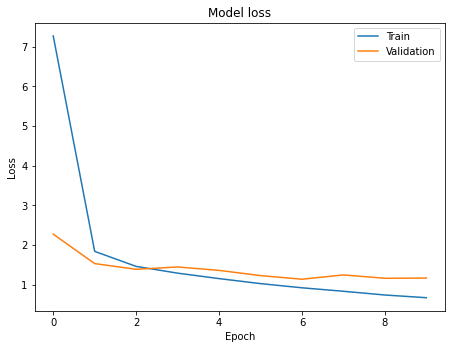

In [10]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

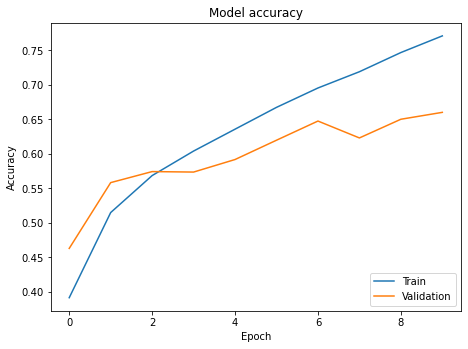

In [11]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

# Results

#### LeakyReLU and SGD optimizer with lr = 0.0001 
=>  Train accuracy: 73%
    Test accuracy: 67%
    
#### Changed the optimizer to Adam
=>  Train accuracy: 98.6%
    Test accuracy: 71%

#### Change from LeakyReLU to tanh
=>  Train accuracy: 99%
    Test accuracy: 69%